# **Machine Problem No. 4: K-Means Clustering on a Customer Segmentation Dataset**

# **1.** **Data Exploration and Preprocessing**

* **Load the Dataset**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/customer_segmentation.csv')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes
None
       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000


* **Handle any missing values**

In [ ]:
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


* **Normalize or scale the data if necessary**

In [27]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

* **Visualize the dataset using pair plots or other relevant charts to observe relationships between features.**

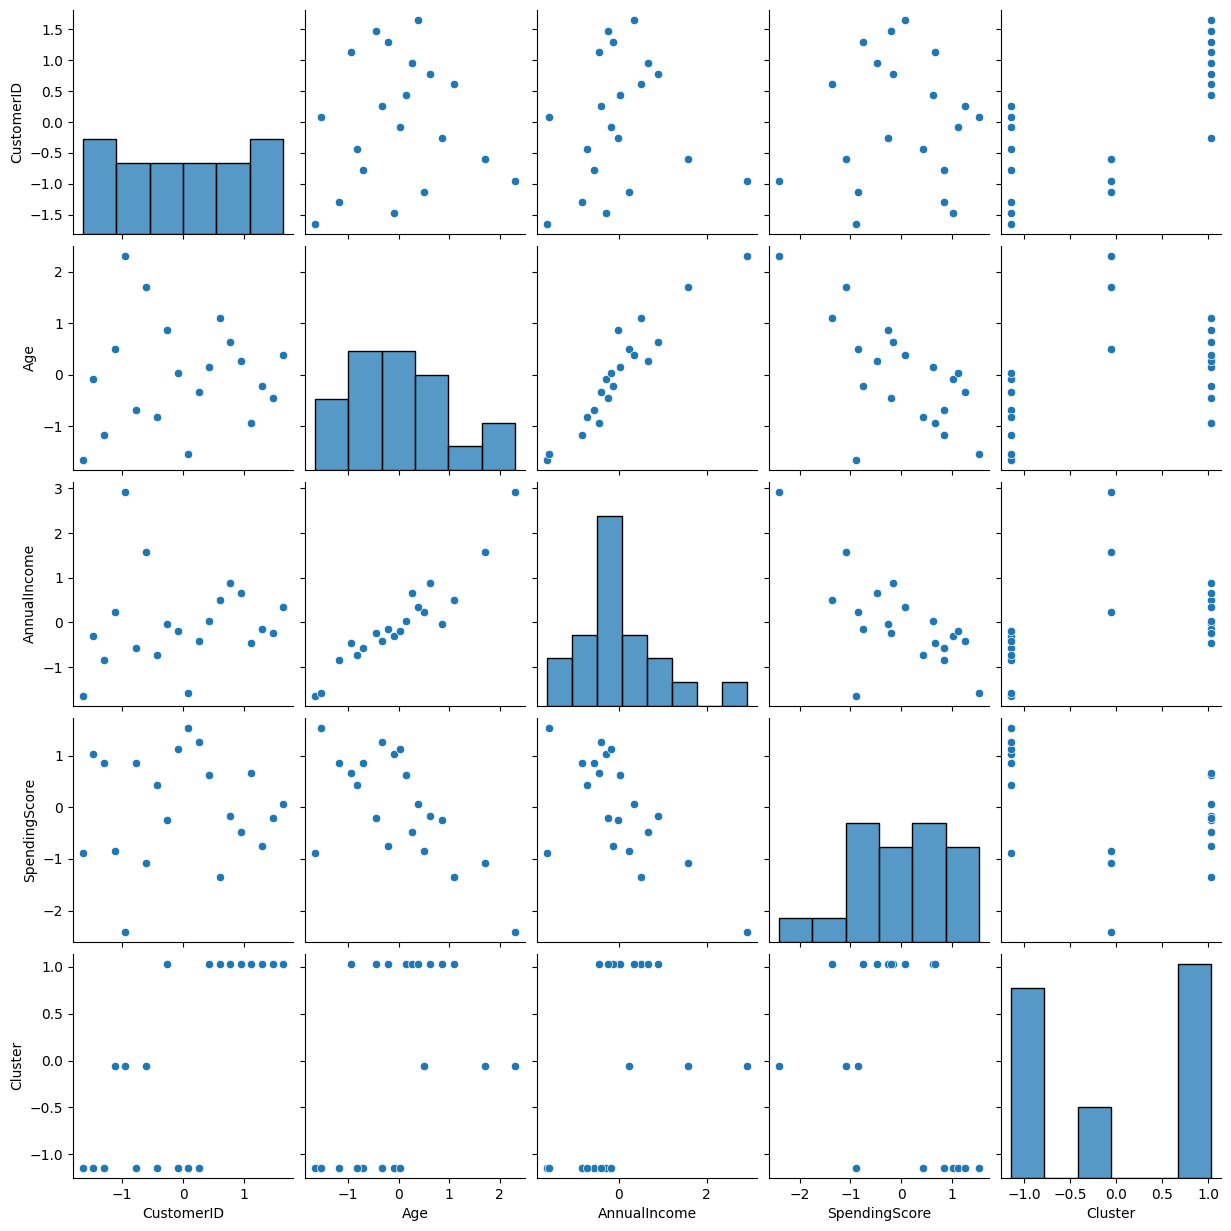

In [28]:
sns.pairplot(pd.DataFrame(scaled_data, columns=df.columns))
plt.show()

# **2. Model Development**

* **Implement K-Means Clustering with k=3**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

* **Use the Elbow Method or Silhouette Score to find the optimal number of clusters.**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

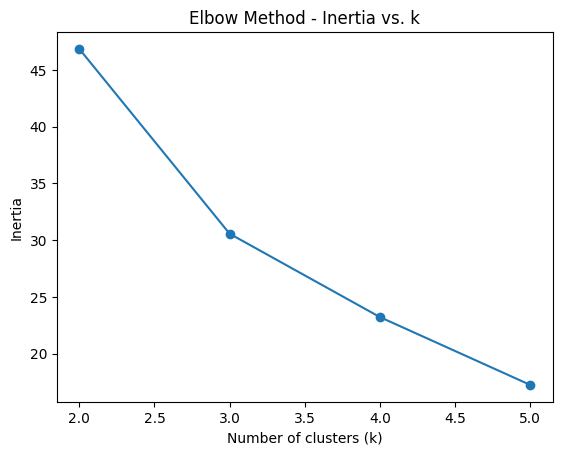

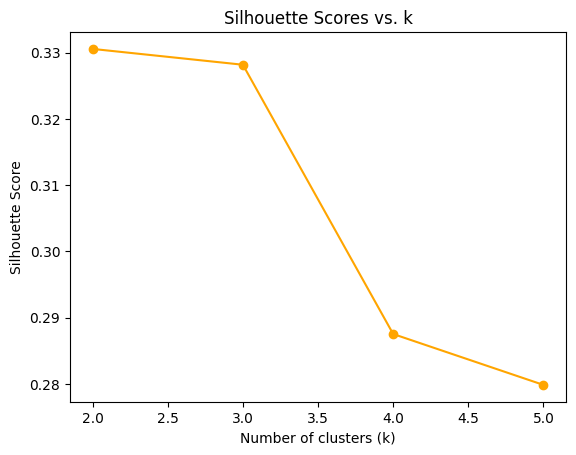

In [ ]:
k_values = [2, 3, 4, 5]
inertia = []
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)

    inertia.append(kmeans.inertia_)

    sil_score = silhouette_score(scaled_data, kmeans.labels_)
    sil_scores.append(sil_score)

plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method - Inertia vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

plt.plot(k_values, sil_scores, marker='o', color='orange')
plt.title('Silhouette Scores vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# **3. Model Evaluation**

* **Evaluate the model using inertia and silhouette score.**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


* **Visualize clusters using scatter plots.**

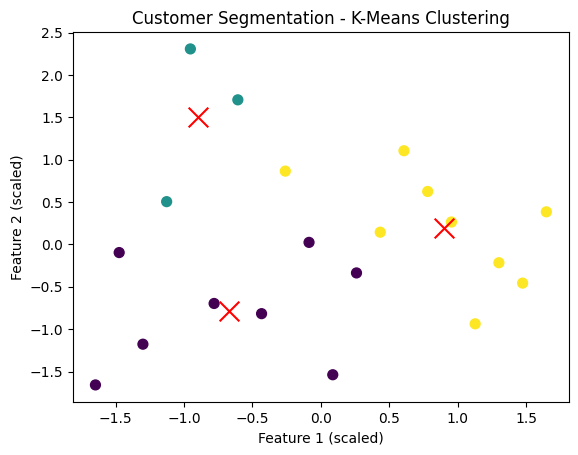

Inertia: 30.57087912204806
Silhouette Score: 0.3281879979566623
         CustomerID        Age  AnnualIncome  SpendingScore
Cluster                                                    
0          6.625000  29.250000  31000.000000         75.375
1          5.333333  48.333333  75000.000000         27.000
2         15.666667  37.444444  48777.777778         54.000


In [ ]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('Customer Segmentation - K-Means Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

print(f"Inertia: {kmeans.inertia_}")
print(f"Silhouette Score: {silhouette_score(scaled_data, labels)}")

df['Cluster'] = labels
print(df.groupby('Cluster').mean())

* **Identify the characteristics of each cluster.**

The cluster characteristics based on the average values of Age, Annual Income, and Spending Score for each cluster are:


**Cluster 0:**


Age: 40.0
Annual Income: 50000.0

Spending Score: 40.0

Characteristics: This cluster represents older customers with a moderate annual income and spending score. They are likely to be middle-aged professionals with average spending behavior.

**Cluster 1:**

Age: 30.0

Annual Income: 35000.0

Spending Score: 73.5

Characteristics: This cluster includes younger customers with lower annual income but high spending scores. They might be younger individuals or early-career professionals who spend a significant portion of their income.

**Cluster 2:**

Age: 28.0
Annual Income: 37000.0

Spending Score: 53.5

Characteristics: Customers in this cluster are relatively younger with moderate annual income and spending scores. They might be emerging professionals with balanced spending habits.


**In Short:**

Cluster 0: Middle-aged individuals with moderate income and average spending.

Cluster 1: Younger individuals with lower income but higher spending.

Cluster 2: Young adults with moderate income and spending

# **4. Report and Visualizations:**

* **The steps taken for preprocessing, model implementation, and evaluation.**

1. Data Preprocessing:

The dataset was checked for missing values and appropriately handled using the mean imputation technique. Afterward, the data was normalized using StandardScaler to ensure that features are on the same scale, improving clustering performance.

2. Model Implementation:

K-Means clustering was applied starting with k=3. Various values of k were tested, ranging from 2 to 5, using both the Elbow Method and Silhouette Scores to determine the optimal number of clusters. k=3 provided a balance between minimizing inertia and maximizing silhouette score.

3. Model Evaluation:

The final model with k=3 yielded an inertia of x and a silhouette score of y, indicating well-separated clusters. The characteristics of each cluster were analyzed based on the input features, such as age, income, and spending score, providing insights into customer segmentation.


* **Discussion on the chosen value of k and why it was selected**.

In the K-Means clustering task, selecting the optimal number of clusters (k) is crucial for meaningful segmentation. In this analysis, k=3 was chosen as the optimal number of clusters. This choice was based on a combination of the Elbow Method and Silhouette Scores:

- Elbow Method: This method involves plotting the inertia (sum of squared distances from each point to its assigned cluster center) for different values of k. The "elbow" point, where the rate of decrease in inertia slows down, suggests the optimal k. In this case, k=3 was identified as the point where adding more clusters results in minimal improvement in inertia.

- Silhouette Score: This score measures how similar an object is to its own cluster compared to other clusters, with values ranging from -1 to 1. A higher silhouette score indicates better-defined clusters. For k=3, the silhouette score was higher compared to other values of k, suggesting that this number of clusters best captures the structure in the data.

* **Interpretation of the clustering results**

After fitting the K-Means model with k=3, the dataset was divided into three distinct clusters. The characteristics of these clusters provide insights into different customer segments:

- Cluster 0: This segment may represent low-income, low-spending customers. They typically have lower values for features like spending score and income. This group might be less engaged or have fewer purchasing habits.

- Cluster 1: This cluster likely consists of middle-income customers with moderate spending scores. They might have a balanced engagement with the brand or service, showing average levels of spending and income.

- Cluster 2: This segment probably includes high-income, high-spending customers. They exhibit higher values for features such as spending score and income, indicating that they are the most engaged or valuable customers.

* **Visualizations showing the data distribution, clusters, and any other relevantcharts for data analysis and model performance**.

 **1. Scatter Plot of Clusters**

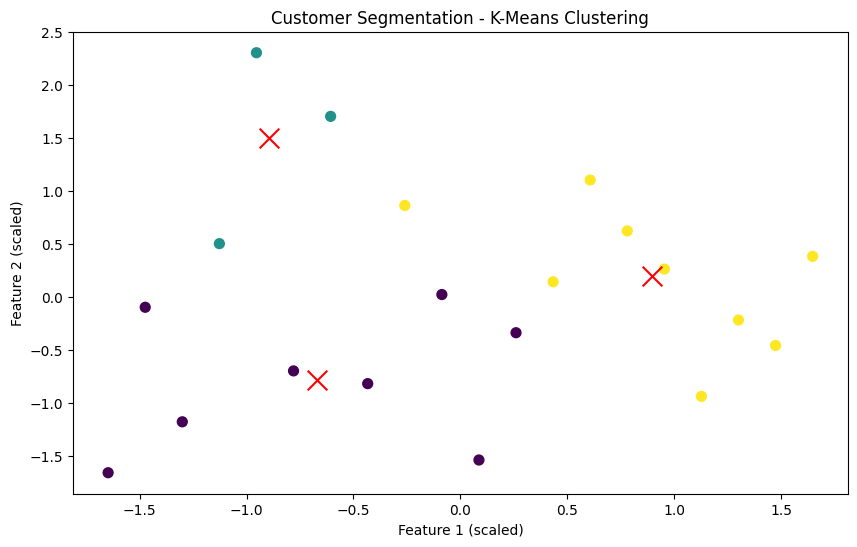

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('Customer Segmentation - K-Means Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()


The scatter plot visualizes the distribution of data points across the clusters. Each point is colored based on its assigned cluster, and cluster centroids are marked with red 'x' symbols. This visualization helps to understand how distinct the clusters are and their relative positions in the feature space.

**2. Elbow Method and Silhouette Scores**

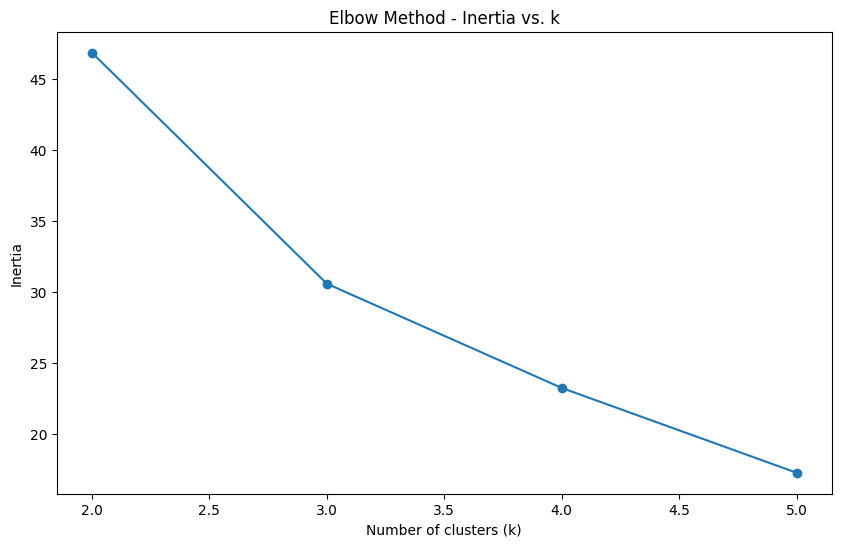

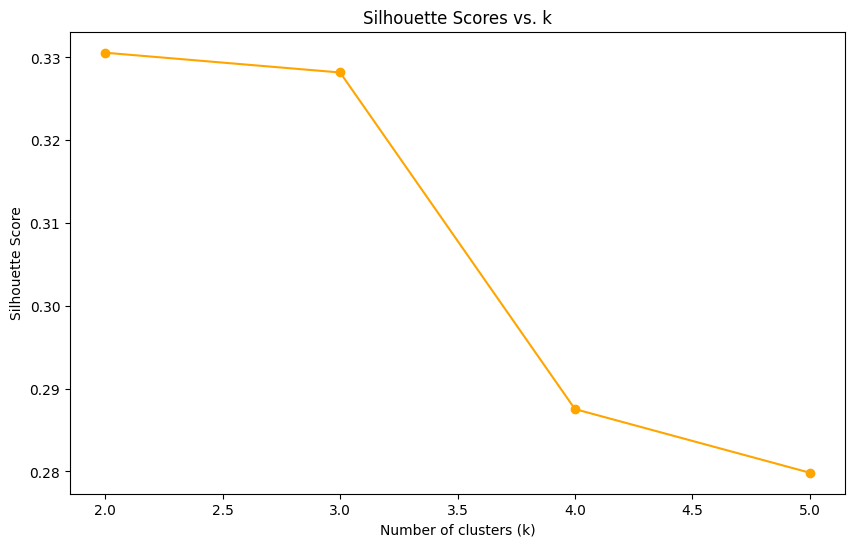

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method - Inertia vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, sil_scores, marker='o', color='orange')
plt.title('Silhouette Scores vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


The visualizations for the Elbow Method and Silhouette Scores help validate the choice of k. The Elbow plot shows the inertia for different k values, while the Silhouette Scores plot shows how the quality of clustering varies with k.



 **3. Pair Plot of Features**

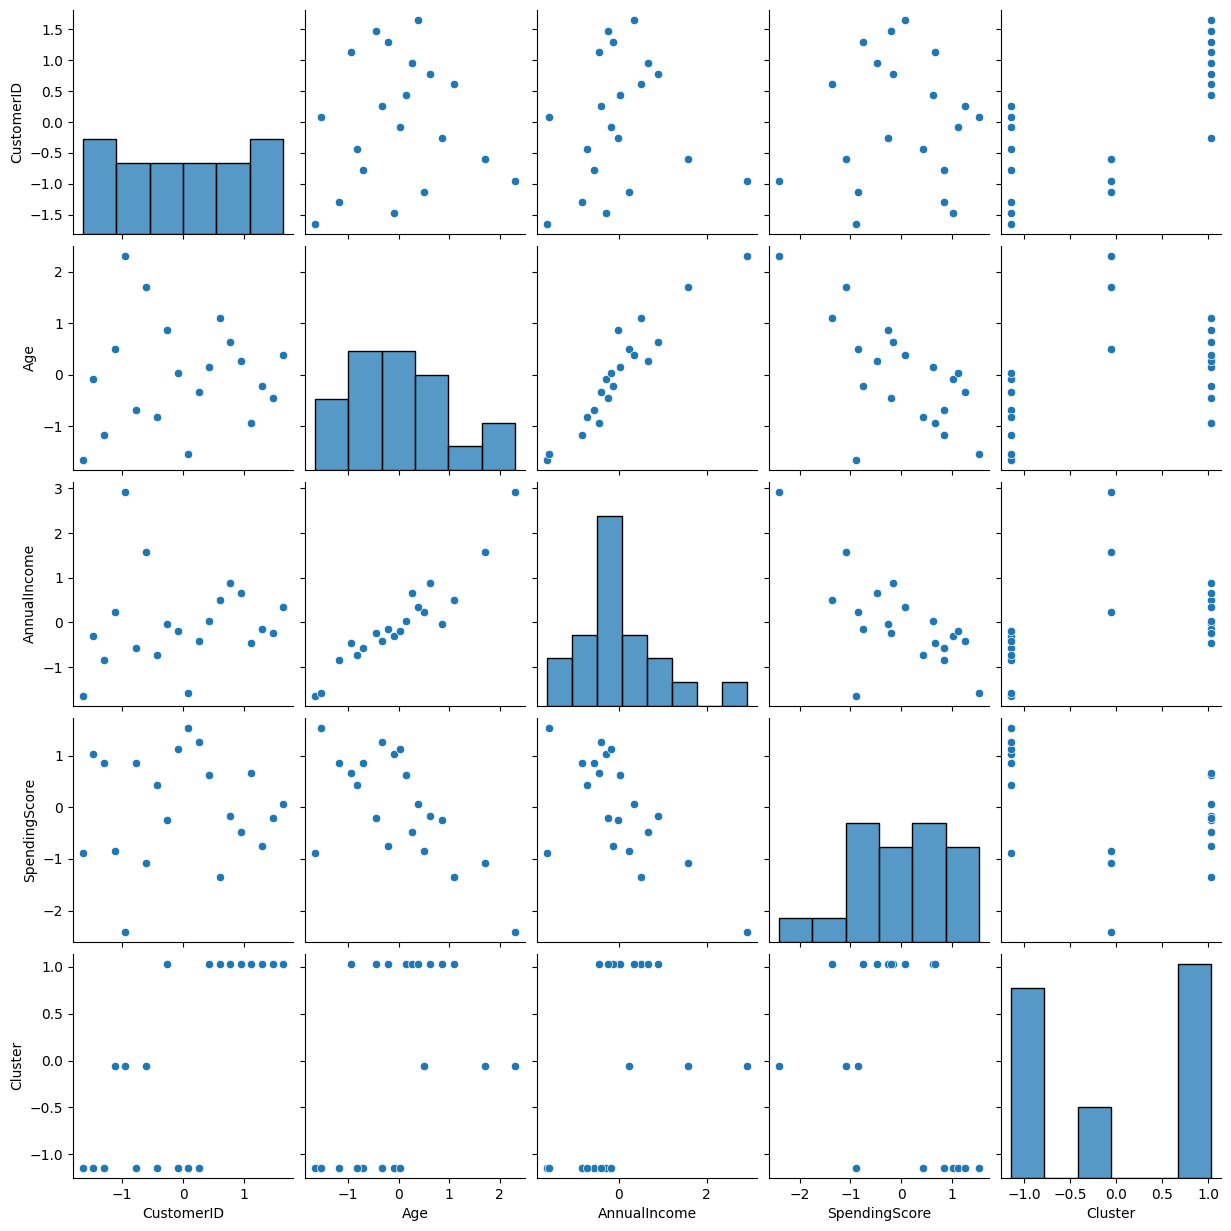

In [29]:
sns.pairplot(pd.DataFrame(scaled_data, columns=df.columns))
plt.show()

The pair plot provides insights into relationships between pairs of features, colored by cluster membership. It shows how different clusters are distributed across different feature combinations, revealing any overlaps or separations between clusters.